# Finding the Best Markets to Advertise in


This is a guided project from dataquest.io, where I play the role of an analyst for a e-learning company that is looking to broaden its learners by advertising it in other markets.

The goal of this work is to find the two best markets for my company to advertise in.

In [1]:
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To start, reading a survey csv from freeCodeCamp (https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969) and browsing it a bit to get familiar with it.

In [2]:
survey_data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")
pd.options.display.max_columns = None

c:\users\davi\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
survey_data.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [4]:
survey_data.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,ExpectedEarning,FinanciallySupporting,FirstDevJob,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobRelocateYesNo,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,297.0,1977.0,2472.0,446.0,1076.0,133.0,132.0,544.0,547.0,481.0,1753.0,7200.000000,3833.000000,4508.000000,3858.000000,15291.000000,15329.000000,15380.000000,6397.000000,15256.000000,6402.000000,1371.000000,16714.000000,7623.000000,15293.000000,15222.000000,18068.000000,9223.000000,3201.0,1470.0,1940.0,1092.0,4047.0,4831.0,1875.0,1560.0,2677.0,939.0,584.0,1691.0,6503.000000,16577.000000,17084.000000,403.0,1636.0,773.0,728.0,327.0,187.0,726.0,1123.0,1061.0,345.0,333.0,790.0,408.0,318.0,655.0,311.0,9390.0,1848.0,4402.0,4671.0,3243.0,1341.0,13803.0,2049.0,3800.0,2558.0,6417.0,976.0,2392.0,452.0,11207.0,2260.0,3837.0,5120.0,9765.0,3362.000000,956.0,976.0,1397.0,1453.0,1847.0,2619.0,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56169.169306,0.227498,0.572981,0.609383,0.420901,0.252463,0.854811,0.269970,0.075511,0.568416,166541.105033,15.609250,43169.357864,0.238083,0.024241,0.250609,0.434674,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.771644,957.299753,20.790447,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,31602.625521,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74811.725422,0.419271,0.494700,0.487952,0.493720,0.434439,0.352302,0.443979,0.264223,0.495336,137761.450348,15.283681,61812.293272,0.425924,0.153802,0.433376,0.495741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419806,5003.003169,41.722826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39383.187732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Since our company wants to advertise, it is better to grab on new students (which don't know much yet) and, within them, those who want to spend the products we're offering. The questions we want to answer are:
1. Where are these new coders located.
2. What are the locations with the greatest number of new coders.
3. How much money new coders are willing to spend on learning.

In [5]:
#Generating JobRoleInterest frequency tables without NaN
freq_table_jri = survey_data['JobRoleInterest'].value_counts(normalize = True) * 100
freq_table_jri

Full-Stack Web Developer                                                                                                                                                                                                                                                                              11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                              6.435927
  Data Scientist                                                                                                                                                                                                                                                                                       2.173913
Back-End Web Developer                                                                  

In [6]:
np.sum(freq_table_jri)

100.0

In [7]:
(len(survey_data) - survey_data['JobRoleInterest'].count())/len(survey_data)

0.6152957359009629

In [8]:
survey_data['JobRoleInterest'].count()

6992

People are interested in more than one subject, which may be a little troublesome for our analysis, but nothing impossible.
When analyzing this population, there's the problem that over 60% of it has NaN values for JobRoleInterest, but a population of nearly 7000 respondents may still serve our causes.
Finding out how many out of those are interested in at least one of our main products (web and mobile development).

Proportion of respondents interested in web development: 82.68020594965675
Proportion of respondents interested in mobile development: 32.9662471395881
Proportion of respondents interested in either web or mobile development: 86.3129290617849


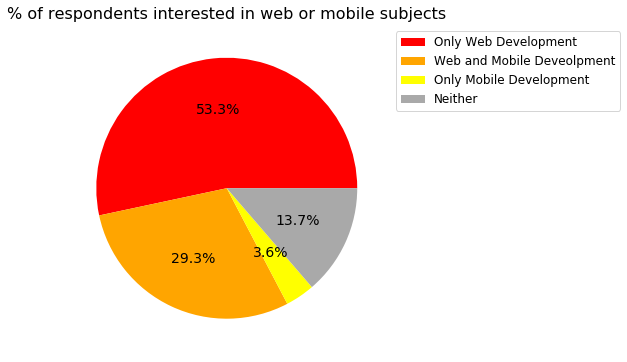

In [9]:
web_count = survey_data['JobRoleInterest'].str.contains('web', case=False, regex=True)
mobile_count = survey_data['JobRoleInterest'].str.contains('mobile', case=False, regex=True)
web_or_mobile_count = survey_data['JobRoleInterest'].str.contains('web|mobile', case=False, regex=True)
only_web_count = survey_data[survey_data['JobRoleInterest'].str.contains('mobile', case=False, regex=True)==False]['JobRoleInterest'].str.contains('web', case=False, regex=True)
only_mobile_count = survey_data[survey_data['JobRoleInterest'].str.contains('web', case=False, regex=True)==False]['JobRoleInterest'].str.contains('mobile', case=False, regex=True)

web_perc = np.sum(web_count) / survey_data['JobRoleInterest'].count()
mobile_perc = np.sum(mobile_count) / survey_data['JobRoleInterest'].count()
web_or_mobile_perc = np.sum(web_or_mobile_count) / survey_data['JobRoleInterest'].count()
only_web_perc = np.sum(only_web_count) / survey_data['JobRoleInterest'].count()
only_mobile_perc = np.sum(only_mobile_count) / survey_data['JobRoleInterest'].count()
web_and_mobile_perc = web_or_mobile_perc - only_web_perc - only_mobile_perc

print("Proportion of respondents interested in web development: " + str(web_perc*100))
print("Proportion of respondents interested in mobile development: " + str(mobile_perc*100))
print("Proportion of respondents interested in either web or mobile development: " + str(web_or_mobile_perc*100))

fig, ax = plt.subplots()

colors = ['red', 'orange', 'yellow', 'darkgray']
ax = plt.pie([only_web_perc, web_and_mobile_perc, only_mobile_perc, (1-only_web_perc-web_and_mobile_perc-only_mobile_perc)], autopct='%1.1f%%', textprops={'fontsize': 14}, colors=colors)
plt.title("% of respondents interested in web or mobile subjects", fontsize=16)
fig.set_size_inches(6,6)
plt.legend(['Only Web Development', 'Web and Mobile Deveolpment', 'Only Mobile Development', 'Neither'], loc=0, bbox_to_anchor=(1,1), fontsize=12)

plt.show()

Now checking where those new web and mobile students are.

In [10]:
#cleaning data first
clean_survey_data = survey_data[survey_data['JobRoleInterest'].isnull()==False]

In [11]:
len(clean_survey_data)

6992

In [12]:
country_abs_freq = clean_survey_data['CountryLive'].value_counts()
country_abs_freq

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Argentina   

In [41]:
np.sum(country_abs_freq)

6838

In [14]:
#some people didn't answer where they live, so I need to get rid of those also
clean_survey_data = clean_survey_data[clean_survey_data['CountryLive'].isnull()==False]

In [42]:
len(clean_survey_data)

6838

In [50]:
country_rel_freq = country_abs_freq / len(clean_survey_data)
country_rel_freq

United States of America         0.457005
India                            0.077216
United Kingdom                   0.046066
Canada                           0.038023
Poland                           0.019158
Brazil                           0.018865
Germany                          0.018280
Australia                        0.016379
Russia                           0.014917
Ukraine                          0.013016
Nigeria                          0.012284
Spain                            0.011261
France                           0.010968
Romania                          0.010383
Netherlands (Holland, Europe)    0.009506
Italy                            0.009067
Serbia                           0.007605
Philippines                      0.007605
Greece                           0.006727
Ireland                          0.006288
South Africa                     0.005703
Mexico                           0.005411
Turkey                           0.005265
Hungary                          0

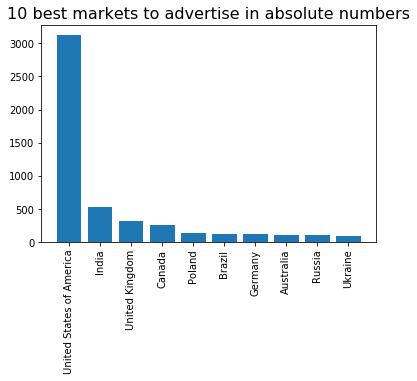

In [52]:
plt.bar(x = country_abs_freq.head(10).index, height = country_abs_freq.head(10))
plt.title("10 best markets to advertise in absolute numbers", fontsize = 16)
plt.xticks(rotation=90)
plt.show()

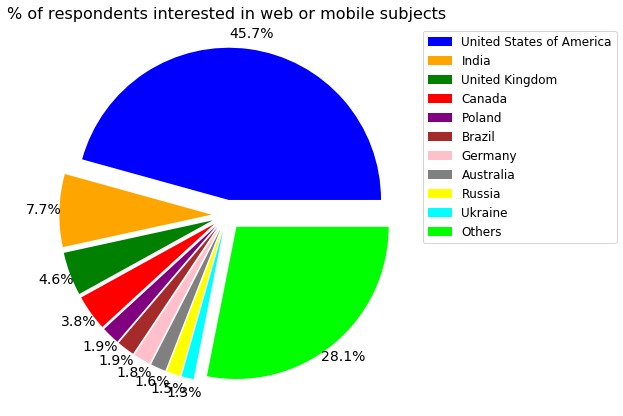

In [84]:
others = 10 #grouping from the 10th member
country_rel_freq_others = np.sum(country_rel_freq[others:])
country_rel_freq_clean = country_rel_freq.copy().head(others+1)
country_rel_freq_clean[others] = country_rel_freq_others
country_rel_freq_clean = country_rel_freq_clean.rename(index = {country_rel_freq_clean.index[others] : 'Others'})

colors = ['blue','orange','green','red','purple','brown','pink','gray','yellow','cyan','lime']
explosion = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
fig, ax = plt.subplots()
ax = plt.pie(country_rel_freq_clean, autopct='%1.1f%%', textprops={'fontsize': 14}, colors=colors, pctdistance=1.1, explode=explosion)
plt.title("% of respondents interested in web or mobile subjects", fontsize=16)
fig.set_size_inches(7,7)
plt.legend(country_rel_freq_clean.index, loc=0, bbox_to_anchor=(1,1), fontsize=12)
plt.show()

Based solely on this, the two recommended markets would be US and India.
I think it takes a little more checking, specially because India is a developing country, maybe its students can't afford our course.

One could think that, just because our courses are in English, we should narrow down our research to english-speaking countries. Yet, the survey our data comes from was taken in english, so most of its respondants can effectively speak it. Also, the fact that the four best ranked countries in the survey speak english is already reflecting the fact that they have english as a native language, so our data is already "cleaned" for that.

In [90]:
clean_survey_data['MoneyForLearning'].describe()

count      6362.000000
mean        888.911977
std        4919.988206
min           0.000000
25%           0.000000
50%          10.000000
75%         200.000000
max      200000.000000
Name: MoneyForLearning, dtype: float64

In [91]:
clean_survey_data['MonthsProgramming'].describe()

count    6519.000000
mean       13.640589
std        29.651124
min         0.000000
25%         2.000000
50%         6.000000
75%        15.000000
max       744.000000
Name: MonthsProgramming, dtype: float64

In [92]:
cleaner_survey_data = clean_survey_data.copy()
cleaner_survey_data = cleaner_survey_data[cleaner_survey_data['MoneyForLearning'].isnull()==False]
cleaner_survey_data = cleaner_survey_data[cleaner_survey_data['MonthsProgramming'].isnull()==False]
cleaner_survey_data.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,ExpectedEarning,FinanciallySupporting,FirstDevJob,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobRelocateYesNo,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,6161.000000,6184.000000,333.000000,338.000000,338.000000,863.000000,413.0,49.0,672.0,88.0,108.0,618.0,866.0,100.0,464.0,42.0,41.0,140.0,194.0,205.0,575.0,5734.000000,1305.000000,0.0,1315.000000,6148.000000,6160.000000,6176.000000,2670.000000,6141.000000,2676.000000,560.000000,6018.000000,2721.000000,6135.000000,6138.000000,6201.0,3070.000000,2493.0,1107.0,1457.0,836.0,3148.0,3776.0,1439.0,1162.0,2029.0,716.0,429.0,1303.0,4923.000000,6212.000000,6212.000000,127.0,770.0,249.0,261.0,88.0,55.0,211.0,398.0,426.0,140.0,119.0,284.0,132.0,100.0,241.0,107.0,3469.0,694.0,1522.0,1532.0,1237.0,315.0,5153.0,697.0,1478.0,842.0,2117.0,424.0,675.0,207.0,3755.0,791.0,1384.0,1819.0,3326.0,1616.000000,327.0,386.0,603.0,562.0,711.0,958.0,450.0,2368.0,421.0,1046.0,1002.0,443.0,1195.0,154.0,66.0,1027.0
mean,27.494076,0.055142,0.486486,0.331361,0.784024,1.835458,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,55337.923788,0.181609,NaN,0.664639,0.437541,0.213961,0.874190,0.253184,0.070021,0.641256,167693.460714,17.111499,39008.732084,0.265037,0.023623,0.0,0.566124,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.773309,900.410979,13.458467,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33135.619431,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.477932,0.228276,0.500570,0.471400,0.412108,0.940599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67667.742685,0.385670,NaN,0.472296,0.496124,0.410133,0.331661,0.434917,0.255203,0.479722,120746.381529,15.029041,38355.234163,0.441389,0.151885,0.0,0.495689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.418734,4970.743144,28.775824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39359.808894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6000.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,6000.000000,0.000000,0.000000,0.0,0.000000,1.0,1.0,1.0,1

In [93]:
len(cleaner_survey_data)

6212

In [99]:
clean_months = cleaner_survey_data['MonthsProgramming'].replace(0,1)
cleaner_survey_data['MonthlyMoneyForLearning'] = cleaner_survey_data['MoneyForLearning'] / clean_months
cleaner_survey_data['MonthlyMoneyForLearning'].head(10)

1      13.333333
2     200.000000
3       0.000000
4       0.000000
6       0.000000
9       5.555556
11      0.000000
15      0.000000
16     16.666667
18     35.714286
Name: MonthlyMoneyForLearning, dtype: float64

In [107]:
grouped_monthly_money_by_country_mean = cleaner_survey_data.groupby(['CountryLive']).mean()
grouped_monthly_money_by_country_mean['MonthlyMoneyForLearning'].sort_values(ascending=False)

CountryLive
Yemen                       10000.000000
Puerto Rico                  4291.394558
Austria                       936.208333
Spain                         784.553084
Jamaica                       747.037037
Hong Kong                     523.341049
Trinidad & Tobago             500.000000
Australia                     419.268452
Taiwan                        417.966524
Luxembourg                    338.817664
Norway                        318.914815
New Zealand                   316.171958
Chile                         300.416667
Israel                        298.130787
Russia                        284.615280
Portugal                      277.752763
Uganda                        276.620370
Vietnam                       243.324074
Bangladesh                    239.361883
Niger                         239.303571
Nigeria                       237.303388
China                         236.441270
United States of America      227.997996
Dominican Republic            201.178266
Soma

In [113]:
grouped_monthly_money_by_country_median = cleaner_survey_data.groupby(['CountryLive']).median()
grouped_monthly_money_by_country_median['MonthlyMoneyForLearning'].sort_values(ascending=False)

CountryLive
Yemen                            10000.000000
Trinidad & Tobago                  500.000000
Nicaragua                          150.000000
Somalia                            150.000000
Taiwan                             137.500000
Papua New Guinea                   125.000000
Angola                             116.666667
Mauritius                          108.333333
Senegal                             80.595238
Paraguay                            73.333333
Rwanda                              50.000000
Macedonia                           43.000000
Luxembourg                          38.888889
Iraq                                37.500000
Uganda                              27.777778
Gambia                              25.000000
Moldova                             25.000000
Cyprus                              17.395833
Saudi Arabia                        16.666667
Ireland                             16.666667
New Zealand                         14.583333
Azerbaijan            

Just did what Dataquest recommended, but it seems a lot off. We should be counting how many students are paying 59 dollars (our product price) for each country, meaning that high outliers are good in this case. Doing that now.

In [117]:
cleaner_survey_data['HasEnoughMoney'] = (cleaner_survey_data['MonthlyMoneyForLearning'] >= 59)
grouped_monthly_money_by_country_count = cleaner_survey_data[cleaner_survey_data['HasEnoughMoney']==True].groupby(['CountryLive']).count()
grouped_monthly_money_by_country_count['HasEnoughMoney'].sort_values(ascending=False)

CountryLive
United States of America         664
India                             75
United Kingdom                    43
Canada                            40
Australia                         22
Spain                             21
Poland                            20
Ukraine                           19
Germany                           16
Brazil                            15
Nigeria                           15
Russia                            13
South Africa                      10
Romania                            9
Italy                              9
Malaysia                           8
Taiwan                             8
France                             8
Netherlands (Holland, Europe)      8
Serbia                             8
Argentina                          7
Israel                             6
Ireland                            6
Austria                            5
Macedonia                          5
Vietnam                            5
Croatia                   

So, results show that US and India are indeed the places to advertise. Actually, advertising just in the US might be even better depending on the costs, since it has a far greater set of potential customers. Or just advertising everywhere, just like when I learned from Dataquest from a gmail ad, to get all english-speaking students, anywhere they are.

This is a decision better suited for the marketing team, data here is very useful to answer questions that otherwise would be answered mostly by feelings.